In [59]:
# IMPORT GENERIC PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

# SNS Plotting Config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

## Read Data

In [60]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [61]:
# Install Panda Profiling if not yet installed
# !pip install pandas_profiling
# import pandas_profiling as pp
# report = pp.ProfileReport(data)
# report

## Clean Data

In [62]:
data['BBL'] = data['BOROUGH'].map(str) + data['BLOCK'].map(str) + data['LOT'].map(str)
data['BBL'] = pd.to_numeric(data['BBL'],errors='coerce')

In [63]:
# Convert to float
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

In [64]:
# Convert to Date
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

In [65]:
# Convert text to numeric
data['BUILDING CLASS AT PRESENT'] = pd.get_dummies(data['BUILDING CLASS AT PRESENT'])
data['TAX CLASS AT PRESENT'] = pd.get_dummies(data['TAX CLASS AT PRESENT'])
data['BUILDING CLASS CATEGORY'] = pd.get_dummies(data['BUILDING CLASS CATEGORY'])

In [66]:
# Replace NULL or NaN with some 0
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(0)
data['SALE PRICE'] = data['SALE PRICE'].fillna(0)
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(0)

In [67]:
data = data[data['COMMERCIAL UNITS'] > 0]
data = data[data['RESIDENTIAL UNITS'] > 0]
data = data[data['YEAR BUILT'] > 0]
data = data[data['ZIP CODE'] > 0]
data = data[data['RESIDENTIAL UNITS'] > 0]
data = data[data['SALE PRICE'] > 1e5]

In [68]:
# Delete unnecessary columns
# del data['Unnamed: 0']
# del data['SALE DATE']
# del data ['EASE-MENT']

In [69]:
LE = preprocessing.LabelEncoder()

In [70]:
LE.fit(data['BUILDING CLASS CATEGORY'])
data['BUILDING CLASS CATEGORY'] = LE.transform(data['BUILDING CLASS CATEGORY'])

In [71]:
LE.fit(data['TAX CLASS AT PRESENT'])
data['TAX CLASS AT PRESENT'] = LE.transform(data['TAX CLASS AT PRESENT'])

In [72]:
LE.fit(data['BUILDING CLASS AT PRESENT'])
data['BUILDING CLASS AT PRESENT'] = LE.transform(data['BUILDING CLASS AT PRESENT'])

In [73]:
LE.fit(data['BUILDING CLASS AT TIME OF SALE'])
data['BUILDING CLASS AT TIME OF SALE'] = LE.transform(data['BUILDING CLASS AT TIME OF SALE'])

In [74]:
LE.fit(data['NEIGHBORHOOD'])
data['NEIGHBORHOOD'] = LE.transform(data['NEIGHBORHOOD'])

In [75]:
LE.fit(data['ADDRESS'])
data['ADDRESS'] = LE.transform(data['ADDRESS'])

In [76]:
# List all the features to be used
features = ['BBL','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','GROSS SQUARE FEET', 'LAND SQUARE FEET','COMMERCIAL UNITS','YEAR BUILT', 'NEIGHBORHOOD', 'ADDRESS','TOTAL UNITS']

In [77]:
# Set X
X = data[features]

In [78]:
# Set Y
y = data['SALE PRICE']

In [79]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [80]:
# Initialize model
model = LinearRegression()

In [81]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
X.describe()

,BBL,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,GROSS SQUARE FEET,LAND SQUARE FEET,COMMERCIAL UNITS,YEAR BUILT,NEIGHBORHOOD,ADDRESS,TOTAL UNITS
count,1.417000e+03,1417.000000,1417.0,1417.0,1417.000000,1417.000000,1.417000e+03,1.417000e+03,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000
mean,7.394512e+06,0.155258,0.0,0.0,1.793931,40.716302,1.434059e+04,7.320431e+03,1.557516,1927.319689,82.906140,697.047283,14.136909
std,3.216567e+07,0.362278,0.0,0.0,0.958101,15.947786,1.106012e+05,1.140434e+05,1.645393,22.371955,56.421715,403.214224,72.083175
min,1.279000e+03,0.000000,0.0,0.0,1.000000,0.000000,0.000000e+00,6.200000e+02,1.000000,1800.000000,0.000000,0.000000,1.000000
25%,3.590290e+05,0.000000,0.0,0.0,1.000000,33.000000,2.611000e+03,1.800000e+03,1.000000,1915.000000,36.000000,348.000000,3.000000
50%,3.111352e+06,0.000000,0.0,0.0,2.000000,50.000000,3.600000e+03,2.092000e+03,1.000000,1927.000000,74.000000,697.000000,3.000000
75%,3.789248e+06,0.000000,0.0,0.0,2.000000,50.000000,5.985000e+03,3.034000e+03,2.000000,1931.000000,131.000000,1045.000000,7.000000
max,4.128551e+08,1.000000,0.0,0.0,4.000000,57.000000,3.750565e+06,4.228300e+06,25.000000,2016.000000,187.000000,1395.000000,1866.000000


In [83]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [84]:
# print coefficient
coefficient

array([-5.15866539e-04, -3.10351148e+05, -3.41795385e-07,  2.70119926e-10,
        9.97878210e+05, -4.97392103e+04,  4.53272319e+02, -3.71756505e+02,
       -2.39109433e+05, -1.17125975e+04,  2.31050263e+02,  8.20620006e+02,
       -7.05090693e+04])

In [85]:
# print intercept
intercept

24988766.619506977

In [86]:
# calculate the R-squared
model.score(X_test, y_test)

0.6093400206233192

In [87]:
y_predicted = model.predict(X_test)

In [88]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd


,Features,Coefficients
0,BBL,-5.158665e-01
1,BUILDING CLASS CATEGORY,-3.103511e+08
2,TAX CLASS AT PRESENT,-3.417954e-04
3,BUILDING CLASS AT PRESENT,2.701199e-07
4,TAX CLASS AT TIME OF SALE,9.978782e+08
5,BUILDING CLASS AT TIME OF SALE,-4.973921e+07
6,GROSS SQUARE FEET,4.532723e+05
7,LAND SQUARE FEET,-3.717565e+05
8,COMMERCIAL UNITS,-2.391094e+08
9,YEAR BUILT,-1.171260e+07


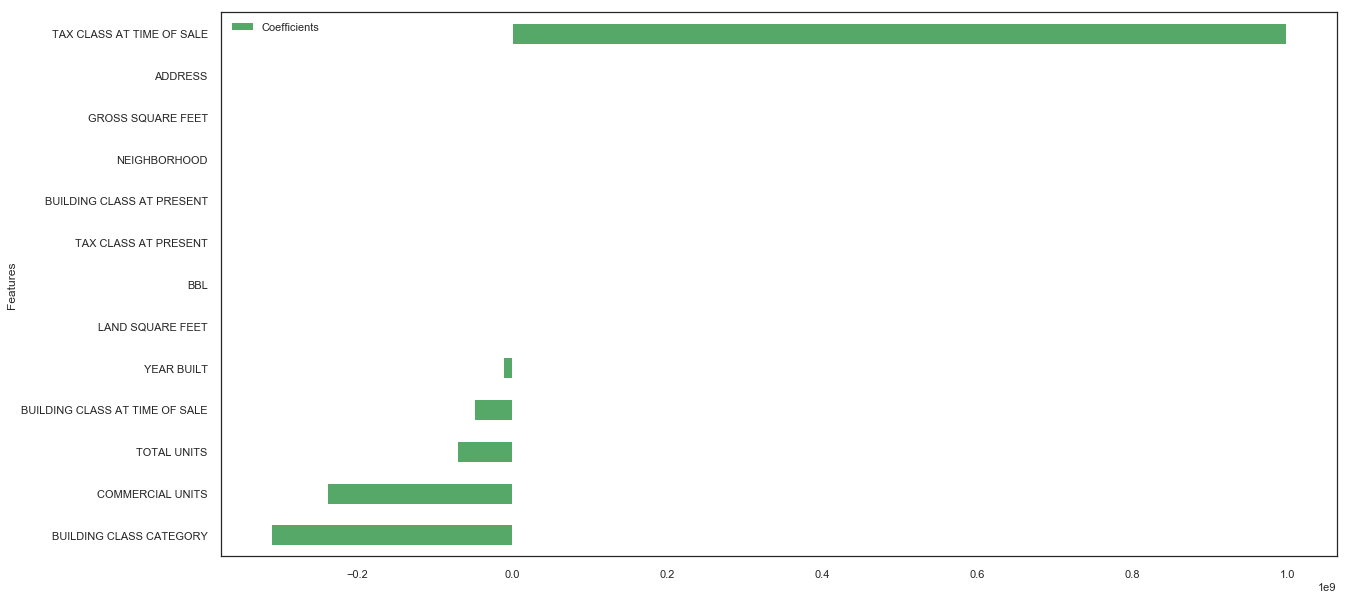

In [89]:
# Plot Contribution chart
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

In [90]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

17548318.386437707

In [91]:
from sklearn.ensemble import RandomForestRegressor as rfr
est = rfr(n_estimators=100, random_state=0).fit(X_train, y_train)
a = est.predict(X_test)

In [92]:
np.sqrt(mse(y_test, a))

22599140.39399988